# **LK 12.2 Pipeline Stream Data**

Nama : Iqbal Biondy
NIM  : 205150601111009
Kelas: Data Engineering-B






# Data descriptions

**About Dataset**

This is the real-time JSON version of the COVID-19 Coronavirus Dataset Worldwide dataset, furthermore, the collection methodology can be read through: https://www.ecdc.europa.eu/en/covid-19/data-collection

Context

The worldwide situation about the COVID-19 (by 2019-03-23), data provided by the European Centre for Disease Prevention and Control and published on the EU Open Data Portal.

Content

The dataset contains the latest available public data on COVID-19 including a daily situation update, the epidemiological curve and the global geographical distribution (EU/EEA and the UK, worldwide). On 12 February 2020, the novel coronavirus was named severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) while the disease associated with it is now referred to as COVID-19. ECDC is closely monitoring this outbreak and providing risk assessments to guide EU Member States and the EU Commission in their response activities.

Acknowledgements

Official link: https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

data source : https://www.kaggle.com/datasets/hgultekin/covid19-stream-data?select=json_1

# Tap Schema

In [ ]:
!pip install -q kaggle
!wget https://raw.githubusercontent.com/yoga-sugitha/DataEngineering/main/kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hgultekin/covid19-stream-data
!mkdir /content/covid_stream
!unzip covid19-stream-data.zip -d covid_stream && rm covid19-stream-data.zip

--2022-11-22 13:15:29--  https://raw.githubusercontent.com/yoga-sugitha/DataEngineering/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      62  --.-KB/s    in 0s      

2022-11-22 13:15:30 (1.71 MB/s) - ‘kaggle.json’ saved [62/62]

  0% 0.00/1.32M [00:00<?, ?B/s]
100% 1.32M/1.32M [00:00<00:00, 132MB/s]
Archive:  covid19-stream-data.zip
  inflating: covid_stream/json       
  inflating: covid_stream/json_1     


In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 199 kB 42.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=e76d10a3d4ae5c043812f69ce874e25c995fa84cacd371517a5f2e5da1f694bd
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

--2022-11-22 13:16:48--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.1-bin-hadoop3.tgz’

spark-3.3.1-bin-had 100%[===================>] 285.48M   179MB/s    in 1.6s    

2022-11-22 13:16:50 (179 MB/s) - ‘spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]



In [ ]:
!tar xf spark-3.3.1-bin-hadoop3.tgz

In [ ]:
!pip install -q findspark

import library

In [ ]:
import pandas as pd
import os
import findspark
from  pandas import json_normalize
from pyspark.sql import SparkSession
from pyspark.sql import Row
from datetime import datetime

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [ ]:
findspark.init()
spark = SparkSession.builder.master("local[*]").getOrCreate()

## extract data

In [ ]:
#normalize data multiline using pandas before go with tap schema pyspark
df = pd.read_json('/content/covid_stream/json')
df2 = json_normalize(df['records'])

In [ ]:
#create spark dataframe using normalized pandas dataframe
dfCov = spark.createDataFrame(df2)
dfCov.show(10)

+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|14/12/2020| 14|   12|2020|  746|     6|            Afghanistan|   AF|                 AFG|3.8041757E7|        Asia|                                                9.01377925|
|13/12/2020| 13|   12|2020|  298|     9|            Afghanistan|   AF|                 AFG|3.8041757E7|        Asia|                                                7.05277624|
|12/12/2020| 12|   12|2020|  113|    11|            Afghanistan|   AF|                 AFG|3.8041757E7|        Asia|    

## Transform data

In [ ]:
dfCov.printSchema()

root
 |-- dateRep: string (nullable = true)
 |-- day: string (nullable = true)
 |-- month: string (nullable = true)
 |-- year: string (nullable = true)
 |-- cases: long (nullable = true)
 |-- deaths: long (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2019: double (nullable = true)
 |-- continentExp: string (nullable = true)
 |-- Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: string (nullable = true)



akan dilakukan drop column `day`, `month`, dan `year` pada dataframe dvCov. Column ini di drop karena sudah ada `dateRep` sebagai column yang memuat date data stream nya

In [ ]:
#function to drop column from spark dataframe
def dropCol(df, col):
  for cols in col:
    df = df.drop(cols)
  return df
dfCov = dropCol(dfCov, {'day','month','year','popData2019','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'})

In [ ]:
dfCov.printSchema()

root
 |-- dateRep: string (nullable = true)
 |-- cases: long (nullable = true)
 |-- deaths: long (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- continentExp: string (nullable = true)



In [ ]:
dfCov.withColumnRenamed('countriesAndTerritories', 'country').withColumnRenamed('countryterritoryCode','countryCode').withColumnRenamed('continentExp','continent').show()

+----------+-----+------+-----------+-----+-----------+---------+
|   dateRep|cases|deaths|    country|geoId|countryCode|continent|
+----------+-----+------+-----------+-----+-----------+---------+
|14/12/2020|  746|     6|Afghanistan|   AF|        AFG|     Asia|
|13/12/2020|  298|     9|Afghanistan|   AF|        AFG|     Asia|
|12/12/2020|  113|    11|Afghanistan|   AF|        AFG|     Asia|
|11/12/2020|   63|    10|Afghanistan|   AF|        AFG|     Asia|
|10/12/2020|  202|    16|Afghanistan|   AF|        AFG|     Asia|
|09/12/2020|  135|    13|Afghanistan|   AF|        AFG|     Asia|
|08/12/2020|  200|     6|Afghanistan|   AF|        AFG|     Asia|
|07/12/2020|  210|    26|Afghanistan|   AF|        AFG|     Asia|
|06/12/2020|  234|    10|Afghanistan|   AF|        AFG|     Asia|
|05/12/2020|  235|    18|Afghanistan|   AF|        AFG|     Asia|
|04/12/2020|  119|     5|Afghanistan|   AF|        AFG|     Asia|
|03/12/2020|  202|    19|Afghanistan|   AF|        AFG|     Asia|
|02/12/202

In [ ]:
dfCov.show(5)

+----------+-----+------+-----------------------+-----+--------------------+------------+
|   dateRep|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|continentExp|
+----------+-----+------+-----------------------+-----+--------------------+------------+
|14/12/2020|  746|     6|            Afghanistan|   AF|                 AFG|        Asia|
|13/12/2020|  298|     9|            Afghanistan|   AF|                 AFG|        Asia|
|12/12/2020|  113|    11|            Afghanistan|   AF|                 AFG|        Asia|
|11/12/2020|   63|    10|            Afghanistan|   AF|                 AFG|        Asia|
|10/12/2020|  202|    16|            Afghanistan|   AF|                 AFG|        Asia|
+----------+-----+------+-----------------------+-----+--------------------+------------+
only showing top 5 rows



In [ ]:
#check & count any null value in dataframe
from pyspark.sql.functions import isnan, when, count, col

dfCov.select([count(when(isnan(c), c)).alias(c) for c in dfCov.columns]).show()

+-------+-----+------+-----------------------+-----+--------------------+------------+
|dateRep|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|continentExp|
+-------+-----+------+-----------------------+-----+--------------------+------------+
|      0|    0|     0|                      0|    0|                   0|           0|
+-------+-----+------+-----------------------+-----+--------------------+------------+



In [ ]:
from pyspark.sql.functions import to_date
df1 = dfCov.withColumn('dateRep',to_date(dfCov.dateRep, 'dd/MM/yyyy'))

In [ ]:
df1.printSchema()

root
 |-- dateRep: date (nullable = true)
 |-- cases: long (nullable = true)
 |-- deaths: long (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- continentExp: string (nullable = true)



## Visualize dataframe

In [ ]:
import seaborn as sns

In [ ]:
#convert pysprak dataframe to pandas dataframe
df_Covid = dfCov.toPandas()
df_Covid.head()

,dateRep,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,continentExp
0,14/12/2020,746,6,Afghanistan,AF,AFG,Asia
1,13/12/2020,298,9,Afghanistan,AF,AFG,Asia
2,12/12/2020,113,11,Afghanistan,AF,AFG,Asia
3,11/12/2020,63,10,Afghanistan,AF,AFG,Asia
4,10/12/2020,202,16,Afghanistan,AF,AFG,Asia


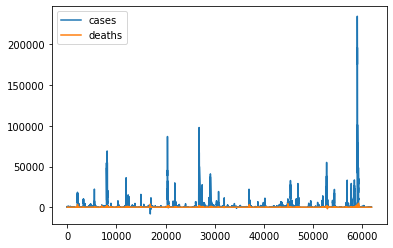

In [ ]:
#visualize numeric data
df_Covid.plot()

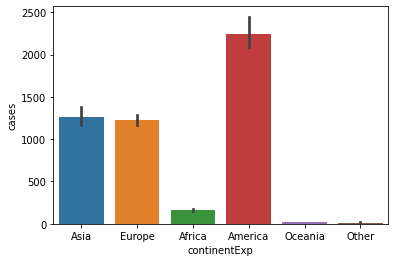

In [ ]:
#visualize categorical data
sns.barplot(x='continentExp',y='cases', data=df_Covid)

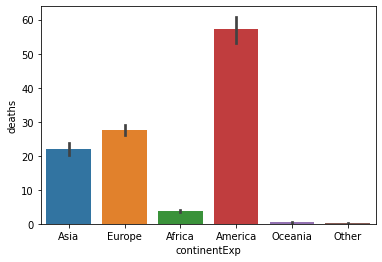

In [ ]:
sns.barplot(x='continentExp',y='deaths', data=df_Covid)

# Load data to Target database (sqllite3)

In [ ]:
import sqlite3

In [ ]:
df_Covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dateRep                  61900 non-null  object
 1   cases                    61900 non-null  int64 
 2   deaths                   61900 non-null  int64 
 3   countriesAndTerritories  61900 non-null  object
 4   geoId                    61900 non-null  object
 5   countryterritoryCode     61777 non-null  object
 6   continentExp             61900 non-null  object
dtypes: int64(2), object(5)
memory usage: 3.3+ MB


In [ ]:
#create schema database and insert data into table
try:
  con = sqlite3.connect('covid.db')
  cur = con.cursor()
  cur.execute(
      ''' CREATE TABLE covid(
        'dateRep'                   DATE,
        'cases'                     INT,
        'deaths'                    INT,
        'countriesAndTerritories'   VARCHAR(50),
        'geoId'                     VARCHAR(7),
        'countryterritoryCode'      VARCHAR(40),
        'continentExp'              VARCHAR(30)
      );'''
  )
  con.commit()
  df_Covid.to_sql('covid', con=con,if_exists='append',index=False)
except sqlite3.Error as er:
  print('error message : ', er)
finally:
  if con:
    con.close()
    print('connection closed')

connection closed
